<a href="https://colab.research.google.com/github/spahlavian/Intro-to-DL-with-fastai/blob/main/Intro_to_DL_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
e"""
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~ Practical Deep Learning tutorial -- Episode 5 ~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

The example used in this notebook was adopted from the following book:
Howard, Jeremy, and Sylvain Gugger. Deep Learning for 
Coders with fastai and PyTorch. O'Reilly Media, 2020.

No licensing is required to use this code, but I will
appreciate  if you reference Rational Machines
IG page and/or YT channel:
@rational_machines
bit.ly/3rU7nKY

-- Written by: Soroush Pahlavian - 2021
"""

In [ ]:
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book() # mount GDrive 
from fastbook import *
from matplotlib import pyplot as plt

We will work on a small subset of MNIST dataset which contains only two digits (3 and 7):

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/root/.fastai/data/mnist_sample')

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

We can set the BASE_PATH to path so that we start from there and not the /root/.fastai...

In [ ]:
Path.BASE_PATH = path

In [ ]:
(path).ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [ ]:
(path /"train").ls()

(#2) [Path('train/3'),Path('train/7')]

In [ ]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

In [ ]:
sevens
im7_path = sevens[54]
im7 = Image.open(im7_path)
im7

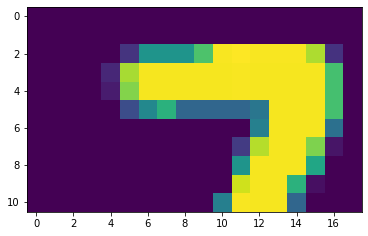

In [ ]:
# --- We can convert PILImageFile to a numpy array or a tensor (on GPU):
# im7_array = array(im7)
# plt.imshow(im7_array)
im7_tensor = tensor(im7)
plt.imshow(im7_tensor[4:15, 4:22])

In [ ]:
# --- We can also use pandas DF to vizualize them in a neat way:
df = pd.DataFrame(im7_tensor[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('BuPu')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,38,132,132,132,184,253,255,253,253,253,224,37,0
3,0,0,0,0,28,222,252,252,252,252,252,253,252,252,252,252,180,0
4,0,0,0,0,19,208,252,252,252,252,252,253,252,252,252,252,180,0
5,0,0,0,0,0,60,119,163,84,84,84,84,100,252,252,252,180,0
6,0,0,0,0,0,0,0,0,0,0,0,0,111,252,252,252,94,0
7,0,0,0,0,0,0,0,0,0,0,0,44,227,252,252,206,14,0
8,0,0,0,0,0,0,0,0,0,0,0,132,252,252,252,151,0,0
9,0,0,0,0,0,0,0,0,0,0,0,237,252,252,164,10,0,0


We will start by making a simple baseline predictive model (pixel similarity):

In [ ]:
three_tensors = [tensor(Image.open(f)) for f in threes]
seven_tensors = [tensor(Image.open(f)) for f in sevens]


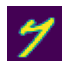

In [ ]:
len(seven_tensors)
seven_tensors[1].shape
show_image(seven_tensors[1])

Let's stack our images into a two tensors and normalize them:

In [ ]:
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens = torch.stack(seven_tensors).float() / 255



In [ ]:
print(stacked_threes.shape)
a_3 = stacked_threes[34]
a_7 = stacked_sevens[54]
a_3.shape

torch.Size([6131, 28, 28])


torch.Size([28, 28])

For this simple model, we will compare new images against the means of 3 and 7 tensors:


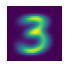

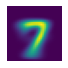

In [ ]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

show_image(mean3), show_image(mean7);

In [ ]:
 def img_distance(a, b):
     return (a - b).abs().mean()

print(img_distance(a_7, mean7))
print(img_distance(a_7, mean3))

tensor(0.1084)
tensor(0.1410)


In [ ]:
(path / 'valid/7').ls()

(#1028) [Path('valid/7/5610.png'),Path('valid/7/7701.png'),Path('valid/7/9573.png'),Path('valid/7/5654.png'),Path('valid/7/5425.png'),Path('valid/7/1933.png'),Path('valid/7/9608.png'),Path('valid/7/4151.png'),Path('valid/7/3103.png'),Path('valid/7/7598.png')...]

Let's create a validation set and a simple MAE fucntion:


In [ ]:
# Stack tensors:
valid_3_tensors = torch.stack([tensor(Image.open(f)) for f in (path/'valid/3').ls()])
valid_7_tensors = torch.stack([tensor(Image.open(f)) for f in (path/'valid/7').ls()])

# Normalize tensors:
valid_3_tensors = valid_3_tensors.float()/255
valid_7_tensors = valid_7_tensors.float()/255

print(valid_3_tensors.shape)

torch.Size([1010, 28, 28])


In [ ]:
def img_distance(input, mean_tensor): 
    return (input-mean_tensor).abs().mean((-1,-2))

def is_3(x): 
    return (img_distance(x, mean3) < mnist_distance(x, mean7)).float()


In [ ]:
is_3(valid_3_tensors).shape

torch.Size([1010])

In [ ]:
accuracy_3s = is_3(valid_3_tensors).mean()
accuracy_7s = (1 - is_3(valid_7_tensors)).mean()

print(accuracy_3s)


tensor(0.9337)
